###  Convolutional Neural Network on MNIST

In [0]:
from keras.layers import *
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#### Building the Model

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

#### Loading the Dataset

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()

In [16]:
def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X / 255.0
    Y = to_categorical(Y)
    return X,Y

Xtrain,Ytrain = preprocess_data(Xtrain,Ytrain)
Xtest,Ytest = preprocess_data(Xtest,Ytest)
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


#### Model Compilation

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(Xtrain,Ytrain,epochs=20,validation_split=0.1,batch_size=128)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 57us/step - loss: 0.2494 - acc: 0.9243 - val_loss: 0.0696 - val_acc: 0.9783
Epoch 2/20
54000/54000 [==============================] - 3s 49us/step - loss: 0.0637 - acc: 0.9804 - val_loss: 0.0456 - val_acc: 0.9870
Epoch 3/20
54000/54000 [==============================] - 3s 53us/step - loss: 0.0445 - acc: 0.9864 - val_loss: 0.0398 - val_acc: 0.9883
Epoch 4/20
54000/54000 [==============================] - 3s 49us/step - loss: 0.0352 - acc: 0.9891 - val_loss: 0.0415 - val_acc: 0.9877
Epoch 5/20
54000/54000 [==============================] - 3s 49us/step - loss: 0.0281 - acc: 0.9909 - val_loss: 0.0364 - val_acc: 0.9900
Epoch 6/20
54000/54000 [==============================] - 3s 52us/step - loss: 0.0226 - acc: 0.9926 - val_loss: 0.0366 - val_acc: 0.9902
Epoch 7/20
54000/54000 [==============================] - 3s 51us/step - loss: 0.0208 - acc: 0.9931 - val_loss: 0.0349 - val_acc:

In [0]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

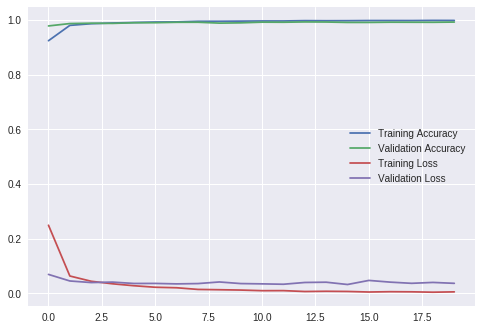

In [19]:
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend()
plt.show()

In [20]:
model.evaluate(Xtest,Ytest)

10000/10000 [==============================] - 1s 55us/step


[0.029525430027430775, 0.9916]